In [57]:
pip install wordcloud pandas nltk sklearn pdfminer seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 21 kB/s eta 0:00:011
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install pdfminer.six

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.6 MB 1.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [119]:
import pandas as pd 
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud,STOPWORDS

In [9]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# Pre - Processing & Data Cleaning

In [5]:
df_orig = pd.read_csv("https://raw.githubusercontent.com/ManishShettyM/ResumeRise/master/Data/resume_dataset.csv")
df = df_orig.copy(deep = True)

In [6]:
length = df["Resume"].shape
length

(1219,)

In [7]:
df.head()

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [8]:
df.tail()

,ID,Category,Resume
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...
1218,1219,Aviation,b'Entry Level Resume Guide\n\nThis packet is i...


In [9]:
df["Category"].value_counts()

Engineering                121
Information Technology     104
Education                  102
Health & Fitness            77
Managment                   74
Accountant                  67
Finance                     66
Sales                       61
Advocate                    61
Digital Media               54
Designing                   51
Banking                     48
Business Development        44
Arts                        43
HR                          41
Building & Construction     29
Automobile                  27
Consultant                  26
BPO                         25
Agricultural                24
Food & Beverages            22
Apparel                     14
Aviation                    13
Public Relations            13
Architects                  12
Name: Category, dtype: int64

In [10]:
df["res_new"] = df["Resume"]
eval_res = df["res_new"].copy(deep=True)

In [11]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(STOPWORDS)
    return [i for i in s if i not in sw]

In [12]:
print(eval_res)

0       b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...
1       b'Name Surname\nAddress\nMobile No/Email\nPERS...
2       b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3       b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4       b"HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...
                              ...                        
1214    b"Free Flight Attendant Resume\nDarlene Flint\...
1215    b'Corporate Flight Attendant Resume\nCAITLIN F...
1216    b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...
1217    b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...
1218    b'Entry Level Resume Guide\n\nThis packet is i...
Name: res_new, Length: 1219, dtype: object


In [13]:
j=0
i=0
l=[]
for i in range(length[0]):
    try:
        eval_res[i] = eval(eval_res[i]).decode()
    except:
        l.append(i)
        pass

In [14]:
df["res_new"] = eval_res
df = df.drop(l,axis=0)
#print(df[30:40])
df = df.reset_index(drop = True)

### Records with missing data ie. resumes must be dealt with. We simply delete these columns as imputation would simply not make any sense.

In [15]:
df = df[["ID","Category","res_new","Resume"]]
df['res_new'].replace('', np.nan, inplace=True)
df.dropna(subset=['res_new'], inplace=True)
df = df.reset_index(drop = True)
df.head()

,ID,Category,res_new,Resume
0,1,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,HUMAN RESOURCES DIRECTOR\nExpert in organizat...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [16]:
df.shape

(1199, 4)

In [17]:
length = df["res_new"].shape
eval_res = df["res_new"].copy(deep=True)

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
for i in range(length[0]):
    eval_res[i] = " ".join(eval_res[i].split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res[i])) #Removing punctaution later since we need punctaution for sentence tokenization
    eval_res[i] = " ".join(token).lower()
eval_res_backup  = eval_res.copy(deep = True)

In [20]:
for i in range(length[0]):
    eval_res[i] = (eval_res[i].encode("ASCII","ignore")).decode() #encoding the text to ascii.
eval_res.shape

(1199,)

In [21]:
df["res_new"] = eval_res

In [22]:
df_cols = ["ID","Category","res_new","Resume"]
df = df[df_cols]
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


### Details like email id, phone number, and noisy regions like censoring with 'x' could be tacked with some reglaur expressions since they seem to follow a pattern.

In [23]:
REGEX_SPACE = re.compile("[ ][ ]+")
REGEX_JUNK = re.compile("[^A-WX-wyz][xX][^A-WX-wyz]+[ ]*|[.\-\_][.\-\_]+")
REGEX_EMAIL = re.compile("[Xx]+[._]?[Xx]+.@.[Xx]+\.?[Xx]+")
REGEX_PNO = re.compile("[(][xX][xX][xX][)][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][\-][xX][xX][xX]+[-][xX][xX][xX]+")

In [24]:
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [25]:
df["newer_res"] = df["res_new"] 
for i,j in enumerate(df.itertuples()):
    strin = re.sub(REGEX_PNO,"",j[3])
    strin = re.sub(REGEX_EMAIL,"",strin)
    strin = re.sub(REGEX_SPACE,"",strin)
    strin  =re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', strin)
    strin = re.sub(REGEX_JUNK, "" ,strin)
    df["newer_res"][i] = strin

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df = df[["ID","Category","newer_res","Resume"]]
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [27]:
df = df[["ID","Category","newer_res","Resume"]]
df['newer_res'].replace('', np.nan, inplace=True)
df.dropna(subset=['newer_res'], inplace=True)
df = df.reset_index(drop = True)
df.shape

(1199, 4)

In [28]:
df.to_csv("clean_data1.csv")
print("Cleaned dataset written to cleaned_data.csv")

Cleaned dataset written to cleaned_data.csv


## Analysis

In [29]:
freq = list(collections.Counter(df["Category"]).items())
freq = list(zip(*freq))

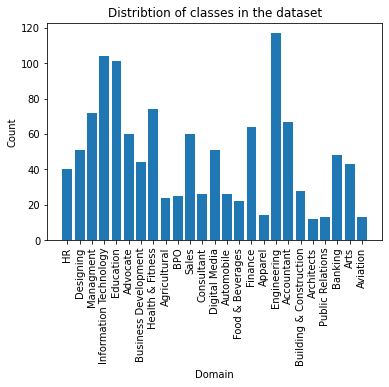

In [30]:
plt.bar(freq[0],freq[1])
plt.ylabel("Count")
plt.xlabel("Domain")
plt.title("Distribtion of classes in the dataset")
plt.xticks(rotation=90)
plt.show()

## Frequency of words in the resumes.

In [31]:
sw = set(STOPWORDS)
eval_res = df["newer_res"].copy(deep=True)
sw_data=''
for i in eval_res:
    #token = nltk.word_tokentize()
        sw_data+=i
len(sw_data)

6517149

In [32]:
sw = STOPWORDS.union(set(string.punctuation))

In [33]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw,
                min_font_size = 13).generate(sw_data)

## Finding the frequency of adjectives used

### Since for the most part, one is trying to create a good impression of his/her resume in the recruiter's mind, use of good adjectives is really common, rather important and the frequency of adjectives could perhaps give us more insight into our dataset.

In [34]:
length = df.shape

def pos_tag(s):
    return nltk.pos_tag(s)

adj_list={}
for i in range(length[0]):
    token = nltk.word_tokenize(eval_res[i])
    pos_token = pos_tag(token)
    for i,tag in pos_token:
        if tag in ["JJ","JJR","JJS"]:
            if i in adj_list:
                adj_list[i]+=1
            else:
                adj_list[i] = 1

In [35]:
df.shape

(1199, 4)

In [36]:
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [37]:
class_dict = {}

for i in df.itertuples():
    if i[2] not in class_dict:
        class_dict[i[2]] = " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))
    else:
        class_dict[i[2]]+= " " +  " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))

In [38]:
from collections import Counter
window = 2
ngram={}
p=0
for i in class_dict:
    ngram[i]={}
    token = nltk.word_tokenize(class_dict[i])
    for j in range(window,len(token)):
        val = tuple(token[j-2:j])
        if val not in ngram[i]:
            ngram[i][val] = 1
        else:
            ngram[i][val]+=1

### Top 10 most occuring bigrams under each class.

In [39]:
{i:sorted(list(j.items()),key=lambda x:x[1],reverse=True)[:10] for (i,j) in ngram.items()}

{'HR': [(('human', 'resources'), 154),
  (('human', 'resource'), 48),
  (('hr', 'policies'), 32),
  (('employee', 'relations'), 32),
  (('training', 'development'), 25),
  (('hr', 'assistant'), 18),
  (('job', 'descriptions'), 18),
  (('professional', 'experience'), 17),
  (('resources', 'manager'), 17),
  (('performance', 'management'), 17)],
 'Designing': [(('user', 'experience'), 47),
  (('graphic', 'design'), 45),
  (('graphic', 'designer'), 40),
  (('o', 'o'), 29),
  (('web', 'developer'), 27),
  (('new', 'york'), 25),
  (('html', 'css'), 22),
  (('adobe', 'photoshop'), 18),
  (('user', 'interface'), 17),
  (('ux', 'designer'), 17)],
 'Managment': [(('project', 'management'), 100),
  (('project', 'manager'), 75),
  (('customer', 'service'), 29),
  (('professional', 'experience'), 28),
  (('manager', 'resume'), 27),
  (('business', 'development'), 25),
  (('training', 'development'), 24),
  (('customer', 'satisfaction'), 23),
  (('page', '2'), 22),
  (('sales', 'marketing'), 20)],


## Text Representation

#### The classifiers and learning algorithms can not directly process the text documents in their original form,as most of them expect numerical feature vectors with a fixed size rather than raw text docs with variable length. Therefore , during the preprocessing step, the texts are converted to a more manageable representation.

#### One common approach for extracting features from text is to use the bag of words model: a model where for each document, a resume in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

#### TermFrequency and InverseDocumentFrequency is used for each document.

In [40]:
df = pd.read_csv('clean_data1.csv')
df = df.drop(['Resume'],axis=1)
df.rename(columns={'newer_res':'Resume'},inplace=True)
resume_punc = df["Resume"].copy(deep  = True)
df.head()

,Unnamed: 0,ID,Category,Resume
0,0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ..."
1,1,2,HR,name surname address mobile no/email personal ...
2,2,3,HR,anthony brown hr assistant areas of expertise ...
3,3,4,HR,www.downloadmela.com satheesh email id : caree...
4,4,5,HR,human resources director expert organizational...


In [41]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

In [42]:
#Remove punctaution for further processing
for ind,i in enumerate(df.itertuples()):
    token = nltk.word_tokenize(i[4])
    #print(token)
    df["Resume"][ind] = " ".join(rem_punc(token))

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [51]:
import string
from wordcloud import STOPWORDS
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(STOPWORDS)
    return [i for i in s if i not in sw]

def preprocess(eval_res):
    try:
        eval_res = eval(eval_res).decode()
    except:
        pass
    eval_res = eval_res.encode("ASCII","ignore").decode()
    length = len(eval_res)
    eval_res = " ".join(eval_res.split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res)) #Removing punctaution later since we need punctaution for sentence tokenization
    eval_res = " ".join(token).lower()
    return eval_res

## Adding in ID for category to cleaned data

In [43]:
from io import StringIO
col = ['Category', 'Resume']
df = df[col]
df = df[pd.notnull(df['Resume'])]
df.columns = ['Category', 'Resume']
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

df.head()

,Category,Resume,category_id
0,HR,john h. smith p.h.r 800-991-5187 po box 1673 c...,0
1,HR,name surname address mobile no/email personal ...,0
2,HR,anthony brown hr assistant areas of expertise ...,0
3,HR,www.downloadmela.com satheesh email id career ...,0
4,HR,human resources director expert organizational...,0


# Vectorizing docs

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.Resume).toarray()
labels = df.category_id
features.shape

(1199, 22084)

### Using chi2 to see correlated items:

In [45]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    #print(feature_names)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    #trigrams = [v for v in feature_names if len(v.split(' ')) == 3] 
    print("# '{}':".format(Category))
    print("  . Most correlated unigrams:\n\t. {}".format('\n\t. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n\t. {}".format('\n\t. '.join(bigrams[-N:])))
    print("\n\n")
    #print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

# 'Accountant':
  . Most correlated unigrams:
	. chartered
	. accountant
  . Most correlated bigrams:
	. chartered accountant
	. accountant resume



# 'Advocate':
  . Most correlated unigrams:
	. legal
	. law
  . Most correlated bigrams:
	. legal research
	. law school



# 'Agricultural':
  . Most correlated unigrams:
	. agriculture
	. horticulture
  . Most correlated bigrams:
	. pest control
	. achievement american



# 'Apparel':
  . Most correlated unigrams:
	. textiles
	. fashion
  . Most correlated bigrams:
	. fashion designer
	. space planning



# 'Architects':
  . Most correlated unigrams:
	. revit
	. drawings
  . Most correlated bigrams:
	. prepare drawings
	. auto cad



# 'Arts':
  . Most correlated unigrams:
	. artist
	. theatre
  . Most correlated bigrams:
	. make artist
	. special skills



# 'Automobile':
  . Most correlated unigrams:
	. automobile
	. automotive
  . Most correlated bigrams:
	. experience automotive
	. history 2007



# 'Aviation':
  . Most correlated u

### Understanding Why :

#### Suppose there are N instances, and two classes(say A and B).Given a feature X, we can use Chi Square Test to evaluate its importance to distinguish between the classes. By calculating the Chi square scores for all the features, we can rank the features by the chi square scores, then choose the top ranked features for model training. Chi Square Test is used in statistics to test the independence of two events. In feature selection part of this project , the two events are :

1.Occurence of a feature

2.Occurence of a Class/Doc category

Note: the higher value of the chi^2 score, the more likelihood the feature is correlated with the class, thus it should be selected for model training.

### Multi-Class Classifier: Features and Design
To train supervised classifiers, we first transformed the “Resumes” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors and also made sure there is some kind of correlation using the Chi^2 test to confirm that predictions are possible with these features that can be extracted from the documents.

After having this vector representations of the text we can train supervised classifiers to train unseen “Resumes” and predict the “Job Category” on which they fall. After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state = 0)

#print(x_train)

count_vect = CountVectorizer() # bag-of-ngrams model , based on frequency count
x_train_counts = count_vect.fit_transform(x_train)

tfidf_transformer = TfidfTransformer() #passing the word:word count
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

classifier = MultinomialNB().fit(x_train_tfidf, y_train)

### Testing it on an unseen pdf resume

In [47]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convertPDFtoText(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)
    fp.close()
    device.close()
    string = retstr.getvalue()
    retstr.close()
    return string

In [48]:
test_resume = convertPDFtoText('sample_input.pdf')
print(test_resume)

Dushyant Bhatt
BI / Big Data/ Azure

Hyderabad-Deccan, Telangana, Telangana - Email me on Indeed: indeed.com/r/Dushyant-
Bhatt/140749dace5dc26f

• 10+ years of Experience in Designing, Development, Administration, Analysis, Management in
the Business Intelligence Data warehousing, Client Server Technologies, Web-based Applications,
cloud solutions and Databases.
• Data warehouse: Data analysis, star/ snow flake schema data modeling and design specific to
data warehousing and business intelligence environment.
•  Database:  Experience  in  database  designing,  scalability,  back-up  and  recovery,  writing  and
optimizing SQL code and Stored Procedures, creating functions, views, triggers and indexes. 
• Cloud platform: Worked on Microsoft Azure cloud services like Document DB, SQL Azure, Stream
Analytics, Event hub, Power BI, Web Job, Web App, Power BI, Azure data lake analytics(U-SQL).
• Big Data: Worked Azure data lake store/analytics for big data processing and Azure data factory
t

In [49]:
from nltk.probability import FreqDist
from string import punctuation
import math
def summarize(doc,words):
    score={}
    fd = FreqDist(words)
    for i,t in enumerate(doc):
        score[i] = 0
        for j in nltk.word_tokenize(t):
            if j in fd:
                score[i]+=fd[j]
    
    r = sorted(list(score.items()),key=lambda x:x[1],reverse=True)[:math.floor(0.60*len(doc))]
    r.sort(key=lambda x:x[0])
    l = [doc[i[0]] for i in r]
    return "\n\n".join(l)

#### We pass the resume extracted from the pdf using OCR through preprocess function to bring it down to the same state as the trained data, and use this for classification and summarization

# Summary of Test Resume

In [52]:
resume = preprocess(test_resume)#remove stop words etc
sent = nltk.sent_tokenize(test_resume)
puncu = punctuation
word_token = nltk.word_tokenize(test_resume)#tokenize preprocessed text for scoring

print(summarize(sent,test_resume))

Dushyant Bhatt
BI / Big Data/ Azure

Hyderabad-Deccan, Telangana, Telangana - Email me on Indeed: indeed.com/r/Dushyant-
Bhatt/140749dace5dc26f

• 10+ years of Experience in Designing, Development, Administration, Analysis, Management in
the Business Intelligence Data warehousing, Client Server Technologies, Web-based Applications,
cloud solutions and Databases.

• Data warehouse: Data analysis, star/ snow flake schema data modeling and design specific to
data warehousing and business intelligence environment.

•  Database:  Experience  in  database  designing,  scalability,  back-up  and  recovery,  writing  and
optimizing SQL code and Stored Procedures, creating functions, views, triggers and indexes.

• Cloud platform: Worked on Microsoft Azure cloud services like Document DB, SQL Azure, Stream
Analytics, Event hub, Power BI, Web Job, Web App, Power BI, Azure data lake analytics(U-SQL).

• BI:
o  ETL:  Designed  and  developed  ETL  solution  in  SSIS.

Experience  in  Logging,  Err

### Predicted Label for Test Resume

In [53]:
print(classifier.predict(count_vect.transform([test_resume])))

['Information Technology']


### Choosing best parameters for RandomForest Classifier

Maximaum accuracy of 0.6872315202231519 for vlaue of n_estimators 500.


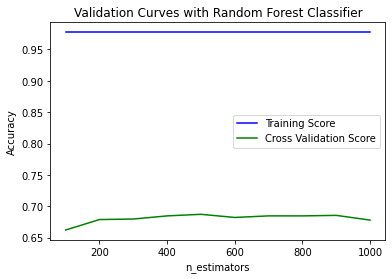

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

num_est = np.arange(100, 1100, 100)

train_score, test_score = validation_curve(RandomForestClassifier(),
                                           X = features, y = labels,
                                           param_name = 'n_estimators',
                                           param_range = num_est, cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(num_est, mean_train_score, label = "Training Score", color = 'b')
plt.plot(num_est, mean_test_score, label = "Cross Validation Score", color = 'g')
plt.xlabel('n_estimators')
plt.ylabel("Accuracy")
ymax = max(mean_test_score)
xmax = num_est[np.argmax(mean_test_score)]
print("Maximaum accuracy of {} for vlaue of n_estimators {}.".format(ymax, xmax))
 
plt.title("Validation Curves with Random Forest Classifier")
plt.legend(loc = 'best')
plt.show()

Maximaum accuracy of 0.6571931659693167 for vlaue of max_depth 30.


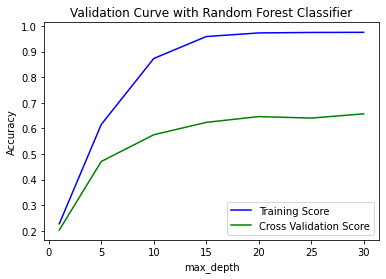

In [135]:
num_dep = [1, 5, 10, 15, 20, 25, 30]

train_score, test_score = validation_curve(RandomForestClassifier(),
                                          X = features, y = labels,
                                          param_name = 'max_depth',
                                          param_range = num_dep, cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(num_dep, mean_train_score, label = "Training Score", color = 'b')
plt.plot(num_dep, mean_test_score, label = "Cross Validation Score", color = 'g')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
ymax = max(mean_test_score)
xmax = num_dep[np.argmax(mean_test_score)]
print("Maximaum accuracy of {} for vlaue of max_depth {}.".format(ymax, xmax))

plt.title("Validation Curve with Random Forest Classifier")
plt.legend(loc = 'best')
plt.show()

Maximaum accuracy of 0.6730299860529987 for vlaue of min_samples_split 25.


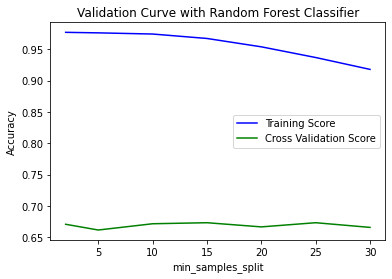

In [134]:
num_splt = [2, 5, 10, 15, 20, 25, 30]

train_score, test_score = validation_curve(RandomForestClassifier(),
                                          X = features, y = labels,
                                          param_name = 'min_samples_split',
                                          param_range = num_splt, cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(num_splt, mean_train_score, label = "Training Score", color = 'b')
plt.plot(num_splt, mean_test_score, label = "Cross Validation Score", color = 'g')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
ymax = max(mean_test_score)
xmax = num_splt[np.argmax(mean_test_score)]
print("Maximaum accuracy of {} for vlaue of min_samples_split {}.".format(ymax, xmax))

plt.title("Validation Curve with Random Forest Classifier")
plt.legend(loc = 'best')
plt.show()

Maximaum accuracy of 0.6722175732217572 for vlaue of min_samples_leaf 1.


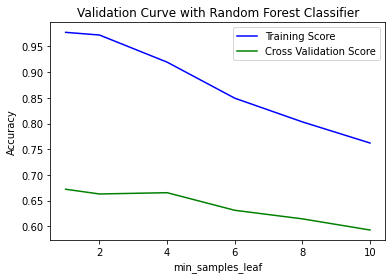

In [132]:
num_lf = [1, 2, 4, 6, 8, 10]

train_score, test_score = validation_curve(RandomForestClassifier(),
                                          X = features, y = labels,
                                          param_name = 'min_samples_leaf',
                                          param_range = num_lf, cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(num_lf, mean_train_score, label = "Training Score", color = 'b')
plt.plot(num_lf, mean_test_score, label = "Cross Validation Score", color = 'g')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
ymax = max(mean_test_score)
xmax = num_lf[np.argmax(mean_test_score)]
print("Maximaum accuracy of {} for vlaue of min_samples_leaf {}.".format(ymax, xmax)) 

plt.title("Validation Curve with Random Forest Classifier")
plt.legend(loc = 'best')
plt.show()

# Comparsions Between Models

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=500, max_depth=15, random_state=1,
                           min_samples_split=25, min_samples_leaf=1),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]


CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

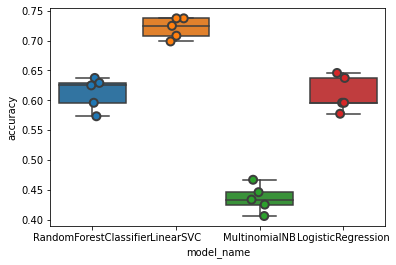

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [139]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.721416
LogisticRegression        0.610481
MultinomialNB             0.435338
RandomForestClassifier    0.612144
Name: accuracy, dtype: float64

# Linear SVC:

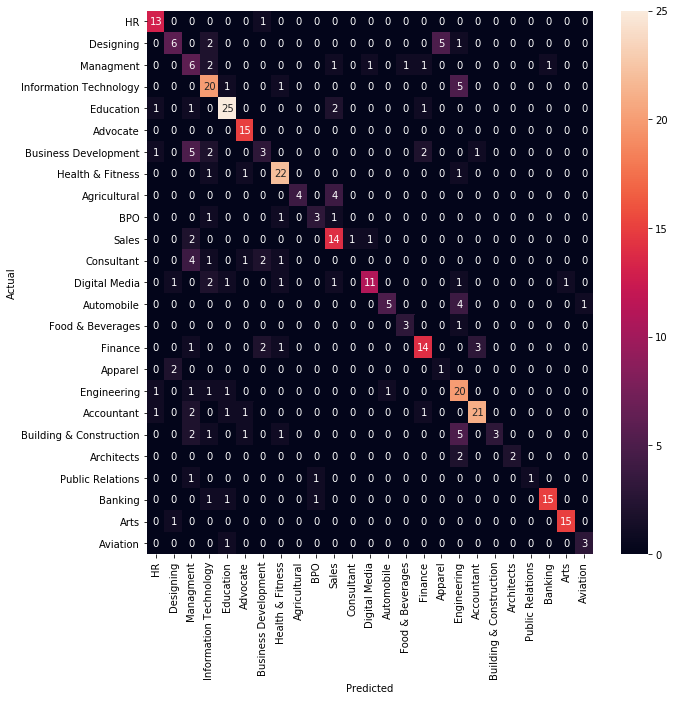

In [58]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.30, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Cosine Similarity

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(df.Resume)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,00,000,0000,00000,000000,0000ga,0000jilljack,0000karennesbit,0000mike,0000phphysi,...,zulu,zulux,zur,zurich,zusammenarbeit,zwart,zwischen,zwitserloot,zxy,zzz
0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.06,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1195,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.00,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198
0,1.000000,0.104997,0.201713,0.159198,0.284479,1.000000,0.151056,0.223803,0.196782,0.238995,...,0.020731,0.022092,0.019829,0.018610,0.041932,0.019674,0.019657,0.019752,0.016425,0.080436
1,0.104997,1.000000,0.231673,0.127942,0.080737,0.104997,0.110397,0.172639,0.141093,0.110362,...,0.010675,0.017591,0.019169,0.008037,0.032947,0.012205,0.034000,0.008179,0.007243,0.077608
2,0.201713,0.231673,1.000000,0.227384,0.138114,0.201713,0.254242,0.259107,0.270331,0.234461,...,0.029778,0.046698,0.030308,0.011436,0.033774,0.033589,0.043920,0.014135,0.019168,0.117545
3,0.159198,0.127942,0.227384,1.000000,0.155793,0.159198,0.280781,0.227793,0.254682,0.171832,...,0.013736,0.034124,0.028192,0.013884,0.028134,0.037893,0.023808,0.012595,0.011615,0.087703
4,0.284479,0.080737,0.138114,0.155793,1.000000,0.284479,0.154407,0.229717,0.218566,0.182534,...,0.021571,0.023429,0.042045,0.014513,0.038920,0.023205,0.021119,0.037425,0.014286,0.099813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.019674,0.012205,0.033589,0.037893,0.023205,0.019674,0.045708,0.034020,0.035512,0.034891,...,0.365063,0.233700,0.185749,0.088002,0.199501,1.000000,0.434808,0.124978,0.105147,0.050877
1195,0.019657,0.034000,0.043920,0.023808,0.021119,0.019657,0.026155,0.029770,0.027253,0.042704,...,0.515813,0.256797,0.221277,0.111790,0.203672,0.434808,1.000000,0.151188,0.128749,0.046667
1196,0.019752,0.008179,0.014135,0.012595,0.037425,0.019752,0.021867,0.029207,0.023882,0.008972,...,0.130090,0.051233,0.229194,0.289213,0.057829,0.124978,0.151188,1.000000,0.177888,0.026578
1197,0.016425,0.007243,0.019168,0.011615,0.014286,0.016425,0.019779,0.015549,0.011869,0.009981,...,0.148883,0.072450,0.189123,0.316259,0.080548,0.105147,0.128749,0.177888,1.000000,0.015804


In [142]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

Z = linkage(similarity_matrix, 'ward')
max_dist = 10

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([df, cluster_labels], axis=1)

,Category,Resume,category_id,ClusterLabel
0,HR,john h. smith p.h.r 800-991-5187 po box 1673 c...,0,9
1,HR,name surname address mobile no/email personal ...,0,9
2,HR,anthony brown hr assistant areas of expertise ...,0,5
3,HR,www.downloadmela.com satheesh email id career ...,0,9
4,HR,human resources director expert organizational...,0,9
...,...,...,...,...
1194,Aviation,free flight attendant resume darlene flint 809...,24,2
1195,Aviation,corporate flight attendant resume caitlin flan...,24,2
1196,Aviation,major conrad a. preedom 2354 fairchild dr. sui...,24,2
1197,Aviation,stacy sample 702 800-0000 cell 0000 email.com ...,24,2
